# Exercise: 
Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset. <br>
For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [1]:
#imports 
import numpy as np
import pandas as pd
import acquire as ac

#visualizations:
import matplotlib.pyplot as plt
import seaborn as sns

#datetime utilities
from datetime import timedelta, datetime

#remove warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# acquire the data: 
df = ac.acquire_store()
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


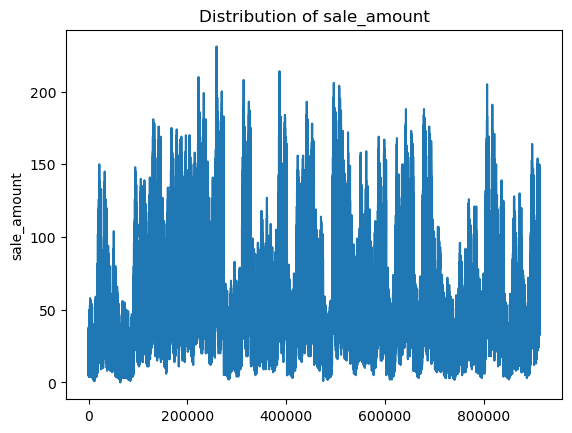

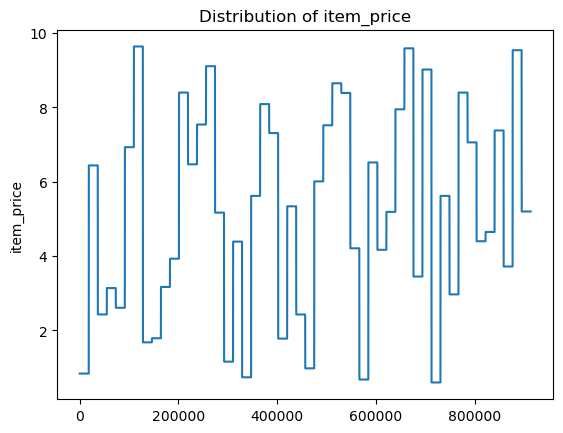

In [3]:
# distribution data: 
num_cols = ['sale_amount','item_price']
for col in num_cols: 
    df[col].plot()
    plt.title(f'Distribution of {col}')
    plt.ylabel(f'{col}')
    plt.show()

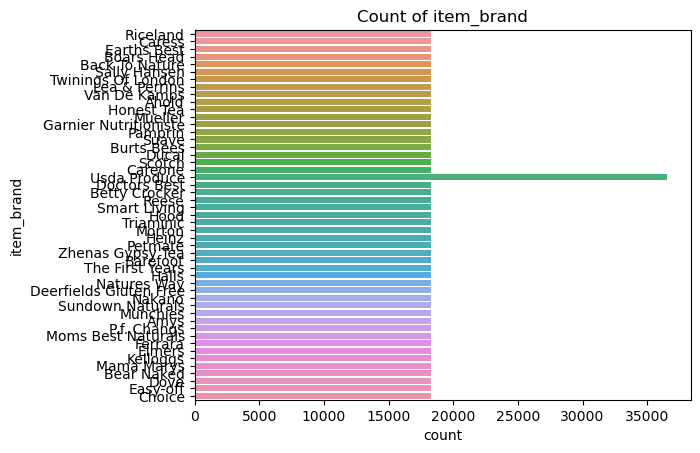

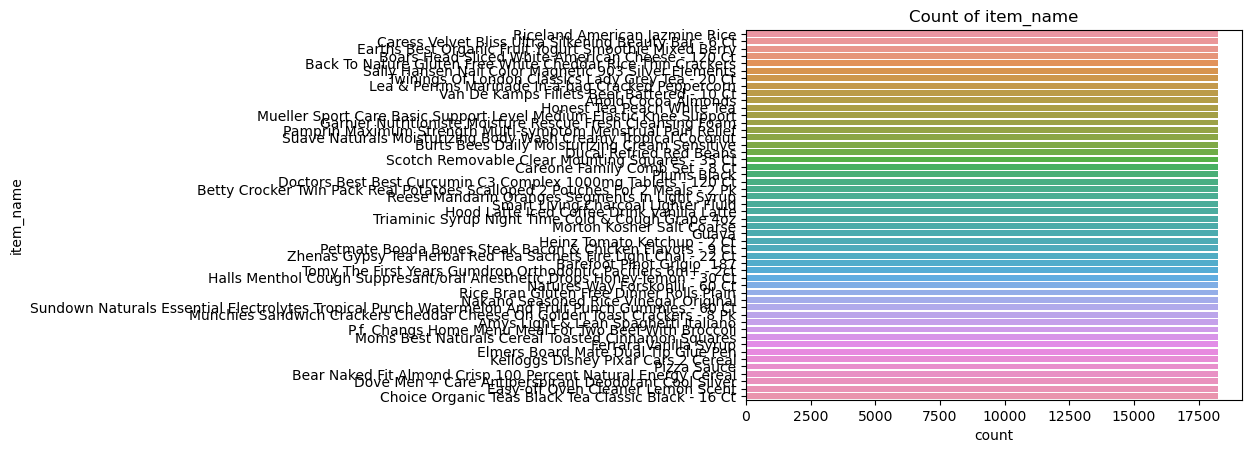

In [4]:
# distribution of categorical columns: 
cat_cols = ['item_brand', 'item_name']
for col in cat_cols:
    sns.countplot(data = df, y = col)
    plt.title(f'Count of {col}')
    plt.show()

In [5]:
def prep_store(df):
    '''
    This function will: 
    - Change sale_date to a dateime data type
    - It will set the index to sale_date
    - add month column and day_of_week column
    - add a sales_total column
    '''
    df['sale_date']  = pd.to_datetime(df['sale_date'], infer_datetime_format = True)
    df = df.set_index('sale_date')
    df['month']= df.index.month_name()
    df['day_of_week'] = df.index.day_name()
    df['sales_total'] = df['sale_amount'] *df['item_price']
    
    return df

In [6]:
df = prep_store(df)
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Tuesday,10.92
2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Wednesday,9.24
2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Thursday,11.76
2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Friday,10.92
2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Saturday,8.40


In [7]:
df.shape

(913000, 9)

# Split data: 

In [8]:
train_size = 0.70 
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index]
test = df[test_start_index:]

In [9]:
train.shape, test.shape

((639100, 9), (273900, 9))

# Explore the data:  
Target = sales total

<Axes: title={'center': 'Distribution of Sales totals'}, xlabel='Sale Total', ylabel='Frequency'>

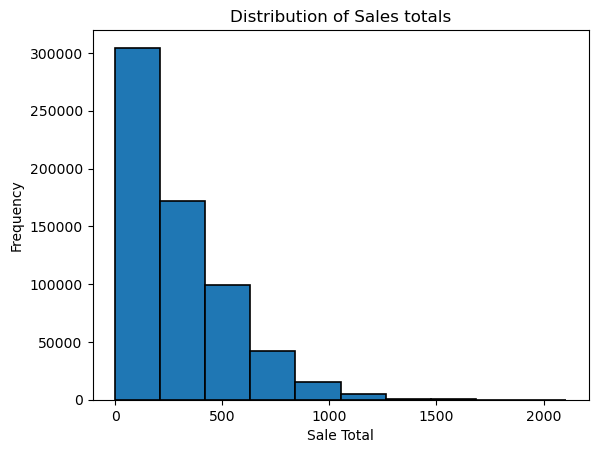

In [10]:
# basic histogram: 
plt.title('Distribution of Sales totals')
plt.xlabel('Sale Total')
train.sales_total.plot.hist(linewidth = 1.2, edgecolor='black')

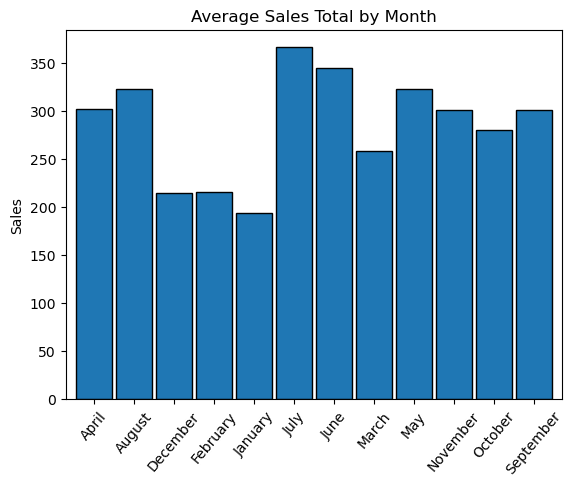

In [11]:
ax = train.groupby(train.month).sales_total.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=50)
ax.set(title='Average Sales Total by Month', xlabel='', ylabel='Sales')
plt.show()

<Axes: xlabel='month', ylabel='sales_total'>

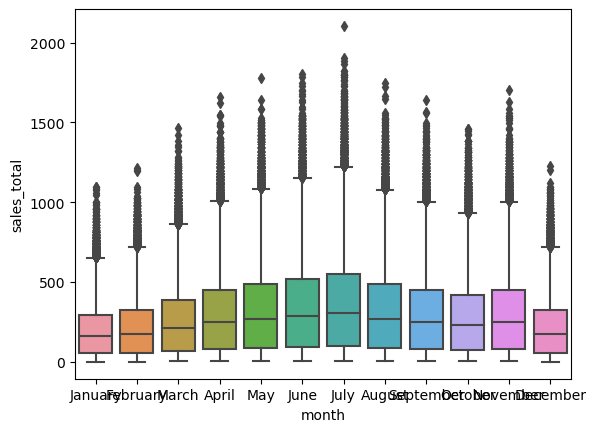

In [12]:
sns.boxplot(data = train, x = 'month', y = 'sales_total')

<Axes: xlabel='month', ylabel='sale_amount'>

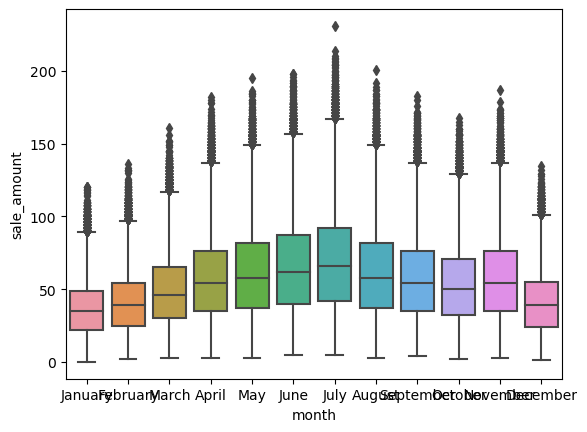

In [13]:
sns.boxplot(data = train, x = 'month' ,y = 'sale_amount')

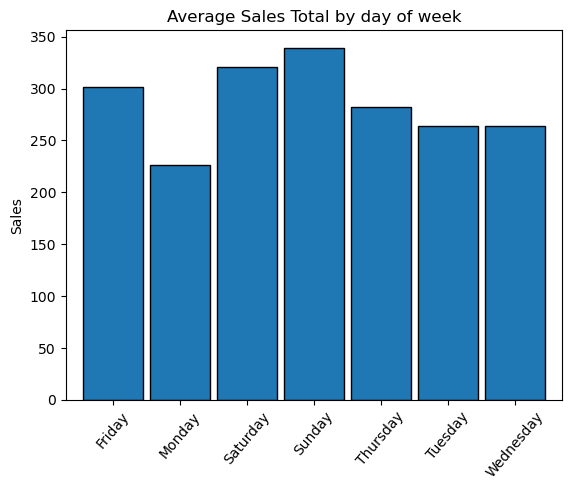

In [14]:
ax = train.groupby(train.day_of_week).sales_total.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=50)
ax.set(title='Average Sales Total by day of week', xlabel='', ylabel='Sales')
plt.show()

<Axes: xlabel='day_of_week', ylabel='sales_total'>

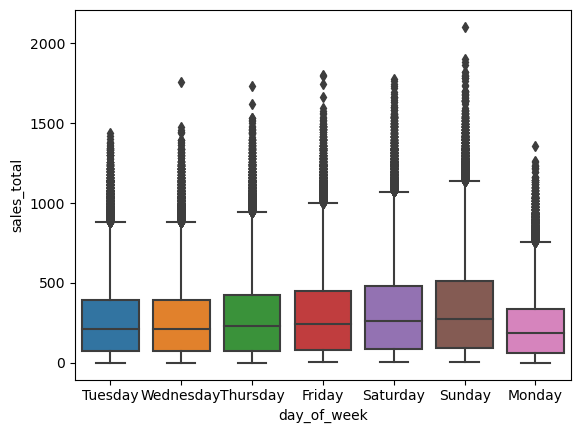

In [15]:
sns.boxplot(data = train, x = 'day_of_week', y = 'sales_total')

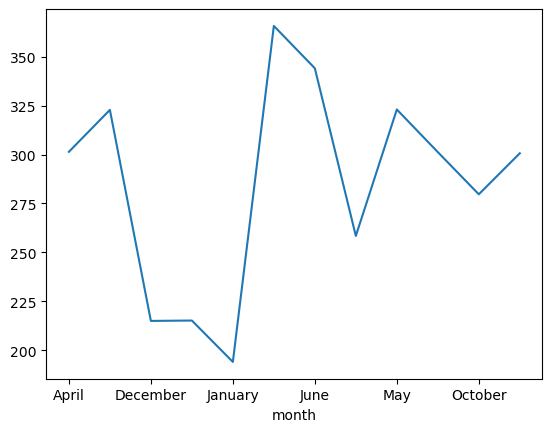

In [16]:
train.groupby('month')['sales_total'].mean().plot();

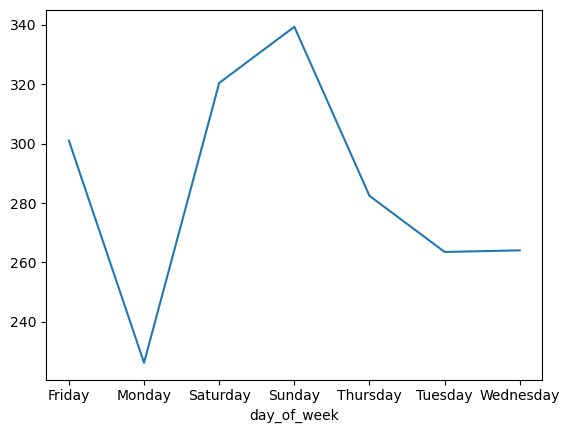

In [17]:
# look a week item prices: 
train.groupby('day_of_week')['sales_total'].mean().plot();

# Visualizing the target over time

In [18]:
daily_total_sales = train.groupby('sale_date').sales_total.sum()

In [19]:
daily_total_sales = pd.DataFrame(daily_total_sales)

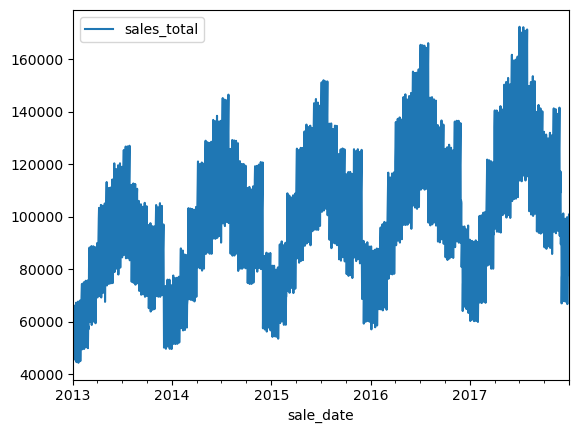

In [20]:
daily_total_sales.plot();

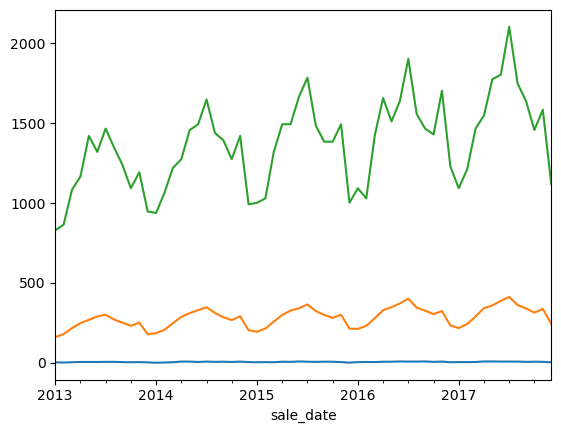

In [21]:
train.resample('M').min()['sales_total'].plot()
train.resample('M').mean()['sales_total'].plot()
train.resample('M').max()['sales_total'].plot()
plt.show()

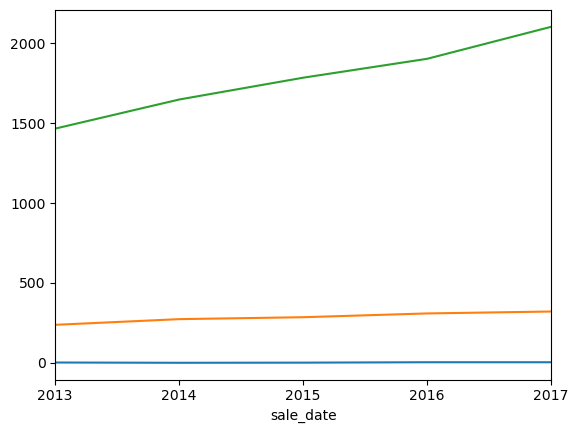

In [22]:
train.resample('Y').min()['sales_total'].plot()
train.resample('Y').mean()['sales_total'].plot()
train.resample('Y').max()['sales_total'].plot()
plt.show()

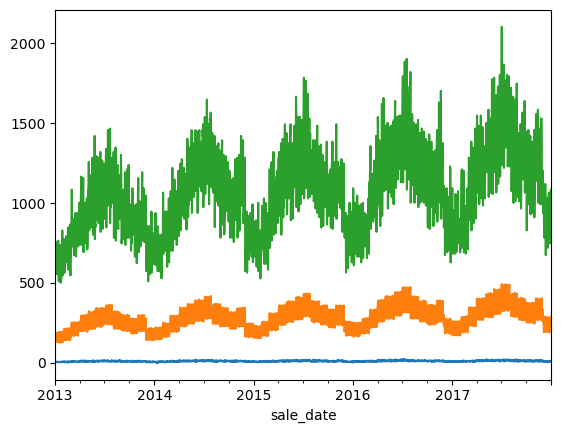

In [23]:
train.resample('D').min()['sales_total'].plot()
train.resample('D').mean()['sales_total'].plot()
train.resample('D').max()['sales_total'].plot()
plt.show()

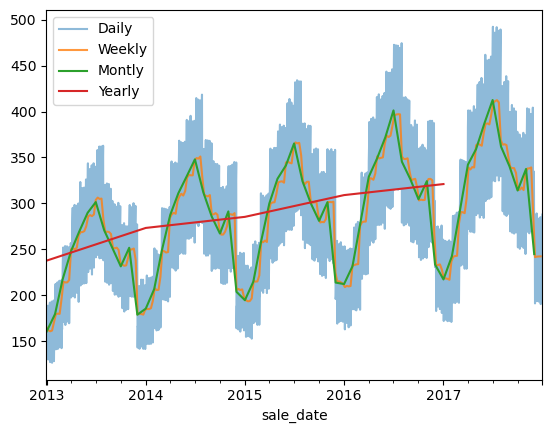

In [24]:
train.resample('D').mean()['sales_total'].plot(alpha=.5, label='Daily')
train.resample('W').mean()['sales_total'].plot(alpha=.8, label='Weekly')
train.resample('M').mean()['sales_total'].plot(label='Montly')
train.resample('Y').mean()['sales_total'].plot(label='Yearly')
plt.legend();

# Seasonal Plot

In [25]:
df.groupby([df.index.year, df.index.month]).mean()

sale_amount  item_price  store_zipcode  sales_total
sale_date sale_date                                                     
2013      1            29.348645      5.1604        78224.8   157.894723
          2            32.815500      5.1604        78224.8   176.411855
          3            39.831097      5.1604        78224.8   214.181650
          4            45.484933      5.1604        78224.8   244.460082
          5            49.241419      5.1604        78224.8   264.663123
          6            53.039800      5.1604        78224.8   285.261279
          7            55.220774      5.1604        78224.8   296.881241
          8            49.468452      5.1604        78224.8   266.183375
          9            45.993800      5.1604        78224.8   247.237694
          10           42.360452      5.1604        78224.8   227.868064
          11           46.176200      5.1604        78224.8   248.108656
          12           32.684323      5.1604        78224.8   175.753692
2014      1            33.934645      5.1604        78224.8   182.410791
          2            37.794071      5.1604        78224.8   203.207122
          3            45.438774      5.1604        78224.8   244.488991
          4            52.594267      5.1604        78224.8   282.786091
          5            56.959806      5.1604        78224.8   306.267538
          6            60.456133      5.1604        78224.8   324.965376
          7            63.807097      5.1604        78224.8   342.849100
          8            57.135226      5.1604        78224.8   307.345466
          9            52.341600      5.1604        78224.8   281.350430
          10           48.960194      5.1604        78224.8   263.133772
          11           53.385533      5.1604        78224.8   286.821036
          12           37.293419      5.1604        78224.8   200.538977
2015      1            35.646000      5.1604        78224.8   191.725206
          2            39.379786      5.1604        78224.8   211.589839
          3            47.158129      5.1604        78224.8   253.739390
          4            54.964467      5.1604        78224.8   295.147608
          5            59.800129      5.1604        78224.8   321.813672
          6            62.478933      5.1604        78224.8   335.850784
          7            66.925806      5.1604        78224.8   359.698008
          8            59.380710      5.1604        78224.8   319.435676
          9            54.888800      5.1604        78224.8   295.088416
          10           51.435677      5.1604        78224.8   276.572155
          11           55.176333      5.1604        78224.8   296.583045
          12           39.198194      5.1604        78224.8   210.886208
2016      1            38.867032      5.1604        78224.8   208.900519
          2            42.410828      5.1604        78224.8   227.977512
          3            51.024581      5.1604        78224.8   274.367406
          4            60.130000      5.1604        78224.8   323.461873
          5            63.789032      5.1604        78224.8   342.986382
          6            68.177600      5.1604        78224.8   366.316222
          7            73.465677      5.1604        78224.8   394.953287
          8            63.322194      5.1604        78224.8   340.315372
          9            59.788733      5.1604        78224.8   321.333920
          10           55.718516      5.1604        78224.8   299.518321
          11           59.429867      5.1604        78224.8   319.532559
          12           42.800710      5.1604        78224.8   229.882967
2017      1            39.826194      5.1604        78224.8   214.148413
          2            44.383500      5.1604        78224.8   238.641958
          3            53.075290      5.1604        78224.8   285.190773
          4            62.590800      5.1604        78224.8   336.550549
          5            65.850710      5.1604        78224.8   353.883534
      

In [26]:
df.groupby([df.index.year, df.index.month]).mean().unstack(0)

sale_amount                                             item_price  \
sale_date        2013       2014       2015       2016       2017       2013   
sale_date                                                                      
1           29.348645  33.934645  35.646000  38.867032  39.826194     5.1604   
2           32.815500  37.794071  39.379786  42.410828  44.383500     5.1604   
3           39.831097  45.438774  47.158129  51.024581  53.075290     5.1604   
4           45.484933  52.594267  54.964467  60.130000  62.590800     5.1604   
5           49.241419  56.959806  59.800129  63.789032  65.850710     5.1604   
6           53.039800  60.456133  62.478933  68.177600  70.974933     5.1604   
7           55.220774  63.807097  66.925806  73.465677  75.573742     5.1604   
8           49.468452  57.135226  59.380710  63.322194  66.219548     5.1604   
9           45.993800  52.341600  54.888800  59.788733  62.350867     5.1604   
10          42.360452  48.960194  51.435677  55.718516  57.494194     5.1604   
11          46.176200  53.385533  55.176333  59.429867  61.922467     5.1604   
12          32.684323  37.293419  39.198194  42.800710  44.849677     5.1604   

                                          store_zipcode                    \
sale_date    2014    2015    2016    2017          2013     2014     2015   
sale_date                                                                   
1          5.1604  5.1604  5.1604  5.1604       78224.8  78224.8  78224.8   
2          5.1604  5.1604  5.1604  5.1604       78224.8  78224.8  78224.8   
3          5.1604  5.1604  5.1604  5.1604       78224.8  78224.8  78224.8   
4          5.1604  5.1604  5.1604  5.1604       78224.8  78224.8  78224.8   
5          5.1604  5.1604  5.1604  5.1604       78224.8  78224.8  78224.8   
6          5.1604  5.1604  5.1604  5.1604       78224.8  78224.8  78224.8   
7          5.1604  5.1604  5.1604  5.1604       78224.8  78224.8  78224.8   
8          5.1604  5.1604  5.1604  5.1604       78224.8  78224.8  78224.8   
9          5.1604  5.1604  5.1604  5.1604       78224.8  78224.8  78224.8   
10         5.1604  5.1604  5.1604  5.1604       78224.8  78224.8  78224.8   
11         5.1604  5.1604  5.1604  5.1604       78224.8  78224.8  78224.8   
12         5.1604  5.1604  5.1604  5.1604       78224.8  78224.8  78224.8   

                            sales_total                                      \
sale_date     2016     2017        2013        2014        2015        2016   
sale_date                                                                     
1          78224.8  78224.8  157.894723  182.410791  191.725206  208.900519   
2          78224.8  78224.8  176.411855  203.207122  211.589839  227.977512   
3          78224.8  78224.8  214.181650  244.488991  253.739390  274.367406   
4          78224.8  78224.8  244.460082  282.786091  295.147608  323.461873   
5          78224.8  78224.8  264.663123  306.267538  321.813672  342.986382   
6          78224.8  78224.8  285.261279  324.965376  335.850784  366.316222   
7          78224.8  78224.8  296.881241  342.849100  359.698008  394.953287   
8          78224.8  78224.8  266.183375  307.345466  319.435676  340.315372   
9          78224.8  78224.8  247.237694  281.350430  295.088416  321.333920   
10         78224.8  78224.8  227.868064  263.133772  276.572155  299.518321   
11         78224.8  78224.8  248.108656  286.821036  296.583045  319.532559   
12         78224.8  78224.8  175.753692  200.538977  210.886208  229.882967   

                       
sale_date        2017  
sale_date              
1          214.148413  
2          238.641958  
3          285.190773  
4          336.550549  
5          353.883534  
6          381.435944  
7          406.321544  
8          355.936411  
9          335.184367  
10         309.170178  
11         332.638297  
12         241.085491

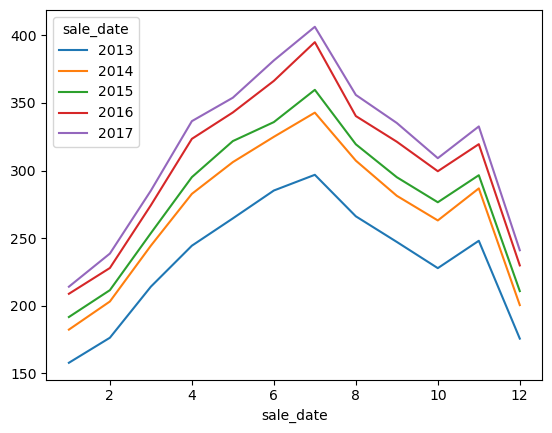

In [27]:
df['sales_total'].groupby([df.index.year, df.index.month]).mean().unstack(0).plot();

# Seasonal Subseries plot: 

In [28]:
table = train['sales_total'].groupby([train.index.year, train.index.month]).mean().unstack()
table

sale_date,1,2,3,4,5,6,7,8,9,10,11,12
sale_date,,,,,,,,,,,,
2013,160.497867,179.581780,217.453441,248.187104,269.321184,289.811751,301.473264,270.737351,250.922474,231.503220,251.741510,178.896391
2014,185.476399,206.731556,248.450366,287.455109,311.116091,329.664094,347.960692,311.991482,285.607760,267.240735,291.303787,203.793351
2015,194.662846,214.842610,257.876426,300.050196,326.857266,341.379091,365.256926,324.133982,299.834344,281.015129,301.322378,213.838853
2016,212.231290,231.571229,278.682033,328.997197,348.584293,372.019398,401.261647,345.374922,326.395368,304.553442,324.274777,233.532300
2017,217.278504,242.557526,289.562100,342.223723,359.132312,387.406052,412.569128,361.755829,340.428136,314.054484,337.513672,244.842685


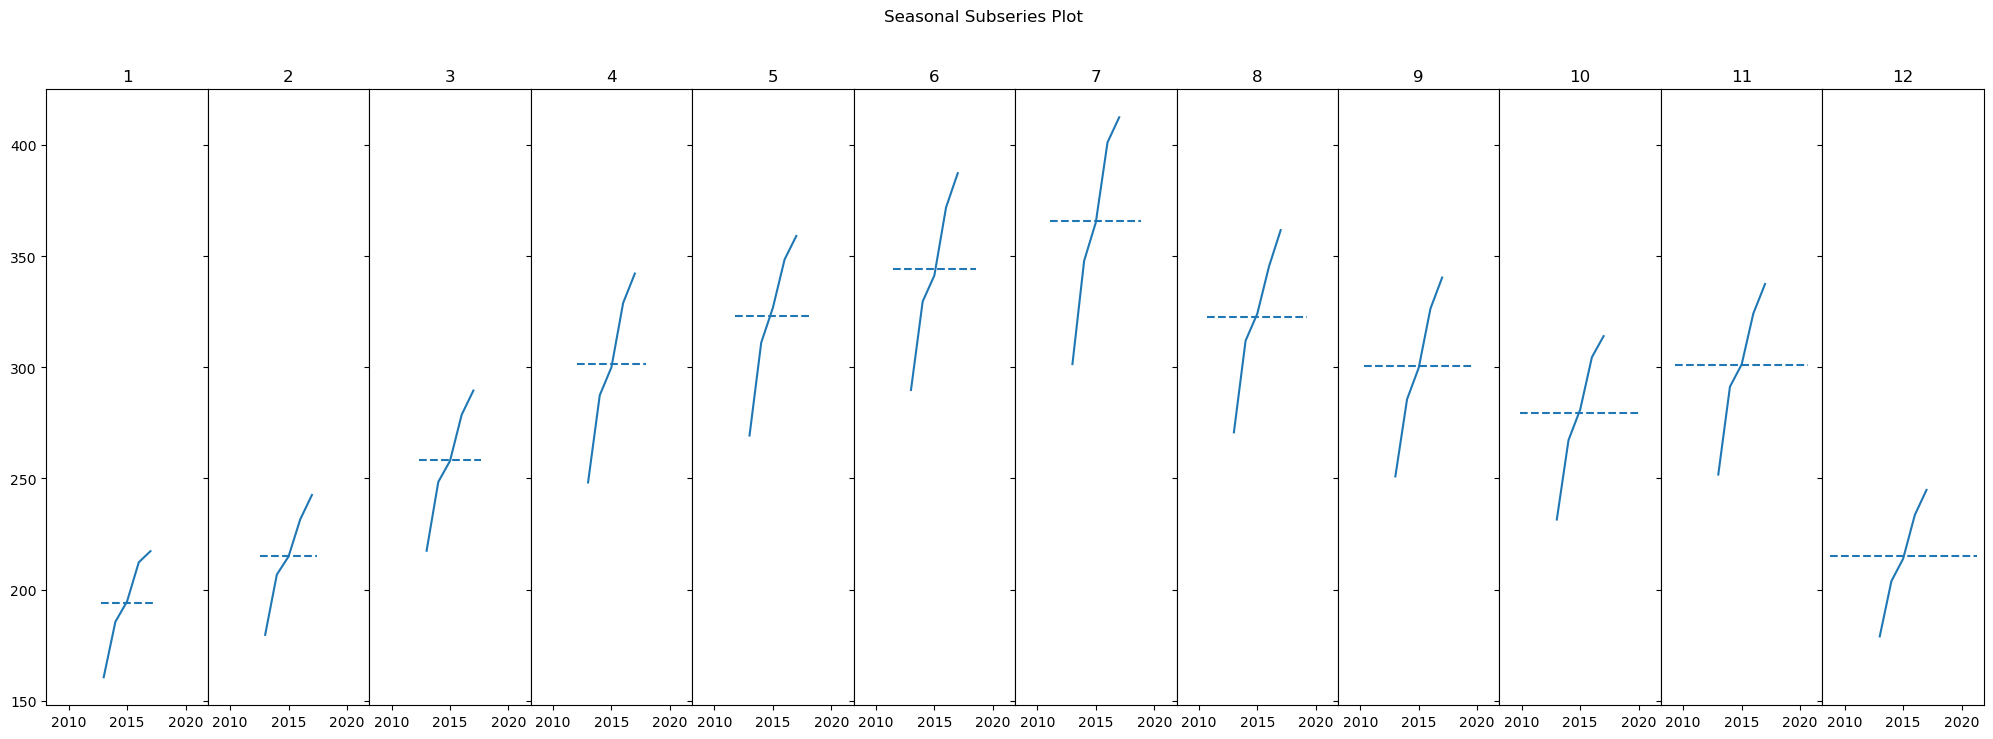

In [29]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(25,8))
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

# Lag Plot

In [30]:
week_mean = train.resample('W').mean()
week_mean.head()

,sale_amount,item_price,store_zipcode,sales_total
sale_date,,,,
2013-01-06,31.524762,4.813429,78224.8,165.624205
2013-01-13,30.868980,4.813429,78224.8,162.168127
2013-01-20,30.682041,4.813429,78224.8,160.822649
2013-01-27,30.822449,4.813429,78224.8,161.657033
2013-02-03,32.538776,4.813429,78224.8,170.481220


In [31]:
# shift it:
week_mean['shifted'] = week_mean['sales_total'].shift(-1)
week_mean.head()

,sale_amount,item_price,store_zipcode,sales_total,shifted
sale_date,,,,,
2013-01-06,31.524762,4.813429,78224.8,165.624205,162.168127
2013-01-13,30.868980,4.813429,78224.8,162.168127,160.822649
2013-01-20,30.682041,4.813429,78224.8,160.822649,161.657033
2013-01-27,30.822449,4.813429,78224.8,161.657033,170.481220
2013-02-03,32.538776,4.813429,78224.8,170.481220,179.459727


Text(0, 0.5, 'Sales Tomorrow')

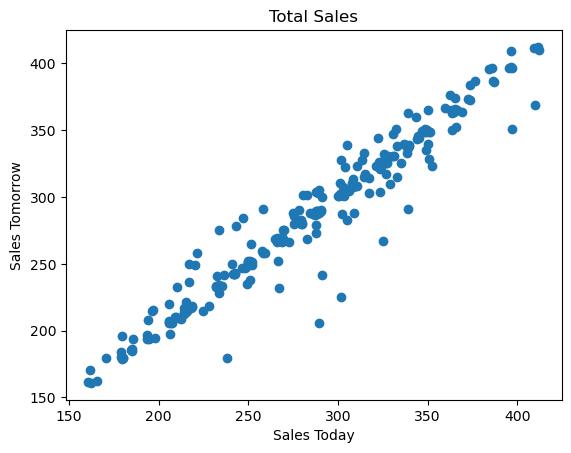

In [32]:
plt.scatter(week_mean['sales_total'], week_mean['shifted'])
plt.title('Total Sales')
plt.xlabel('Sales Today')
plt.ylabel('Sales Tomorrow')

# Autocorrelation plot

###  hello


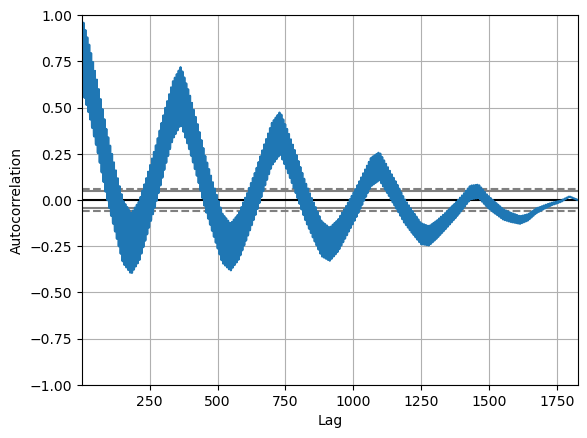

In [33]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('D').mean());

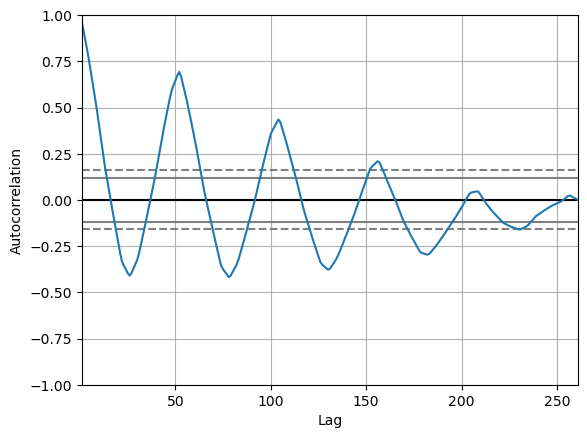

In [34]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean());

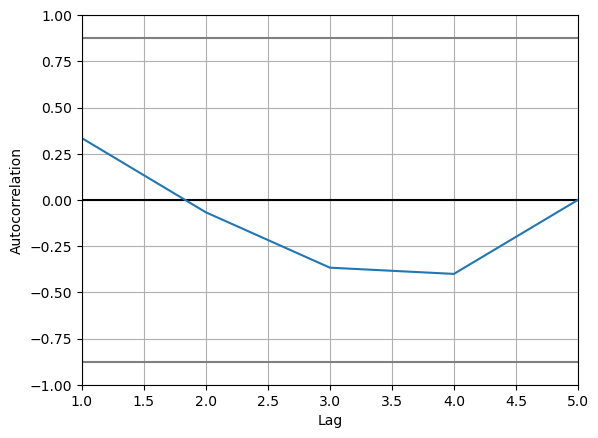

In [35]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('Y').mean());

# Categories over time: 

In [36]:
train = train.resample('D').mean()
# create a categorical feature
train['sales_bin'] = pd.qcut(train.sales_total, 3, labels=['low', 'medium', 'high'])
train.groupby('sales_bin').mean()

,sale_amount,item_price,store_zipcode,sales_total
sales_bin,,,,
low,39.794548,4.813429,78224.8,208.597946
medium,53.983341,4.813429,78224.8,282.946391
high,69.540657,4.813429,78224.8,364.450149


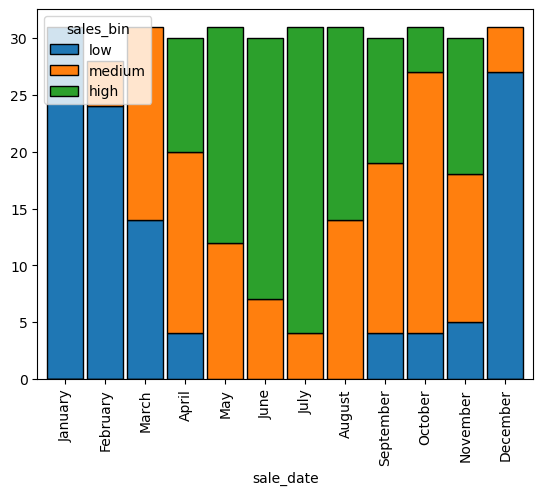

In [37]:
ax = (train.loc['2015']
 .groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

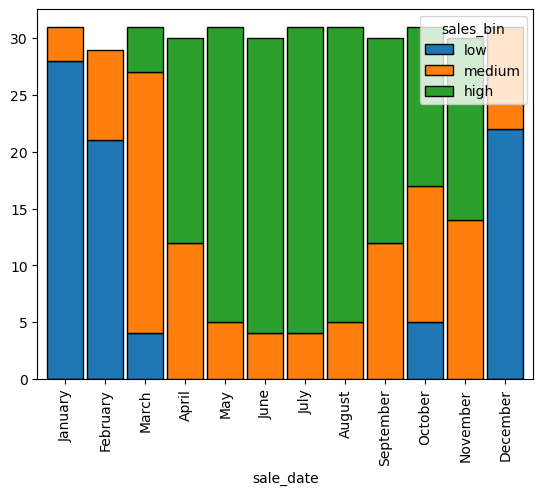

In [38]:
ax = (train.loc['2016']
 .groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

# strftime

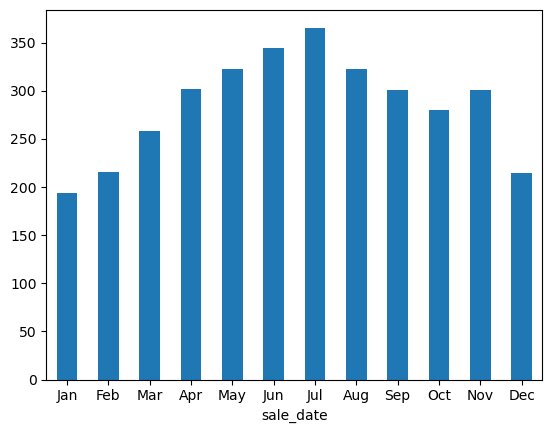

In [39]:
ax = train['sales_total'].groupby(train.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None

# Germany Data: 

In [40]:
germany = ac.get_germany_data()
germany.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [41]:
def prep_germany(germany): 
    '''
    This function will prepare the germany data:
    '''
    germany.Date = germany.Date.astype('datetime64[ns]')
    germany = germany.set_index('Date').sort_index()
    germany['month'] = germany.index.month_name()
    germany['year'] = germany.index.year
    germany['day'] = germany.index.day_name()
    germany.fillna(0, inplace = True)
    return germany

In [42]:
germany = prep_germany(germany)
germany.head()

,Consumption,Wind,Solar,Wind+Solar,month,year,day
Date,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006,Sunday
2006-01-02,1380.521,0.0,0.0,0.0,January,2006,Monday
2006-01-03,1442.533,0.0,0.0,0.0,January,2006,Tuesday
2006-01-04,1457.217,0.0,0.0,0.0,January,2006,Wednesday
2006-01-05,1477.131,0.0,0.0,0.0,January,2006,Thursday


In [43]:
def plot_distributions(df):
    for col in list(df.columns):
        plt.figure()
        sns.histplot(df[col])
        plt.title('Distribution of {}'.format(col))

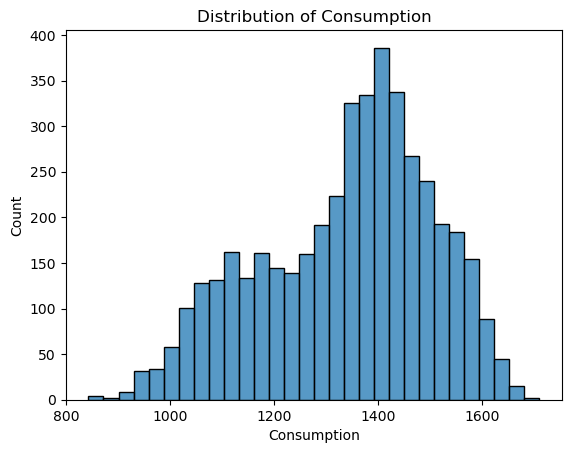

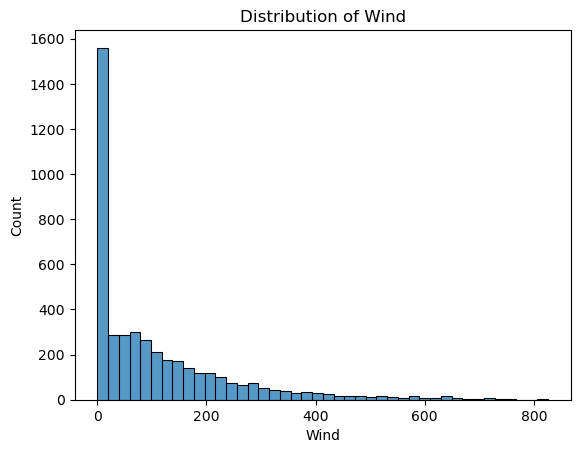

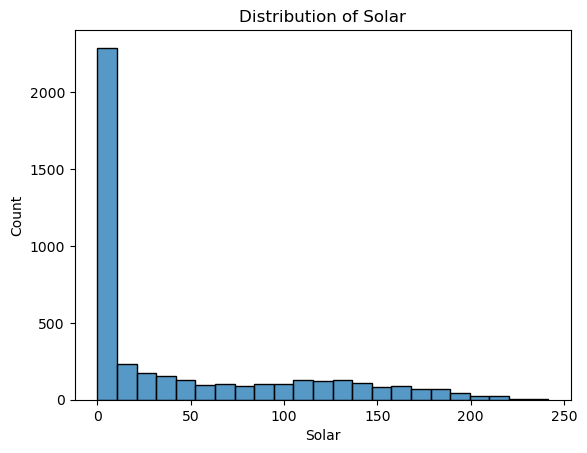

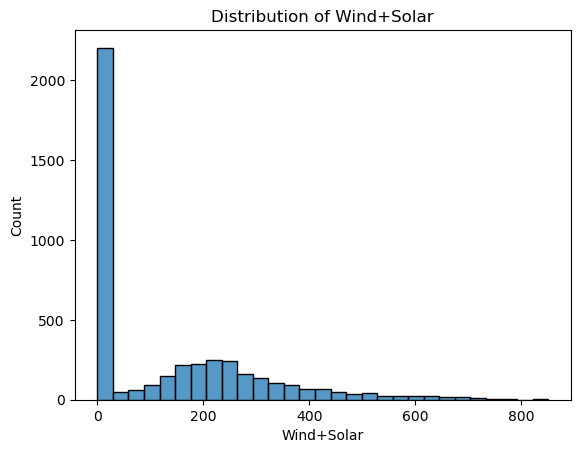

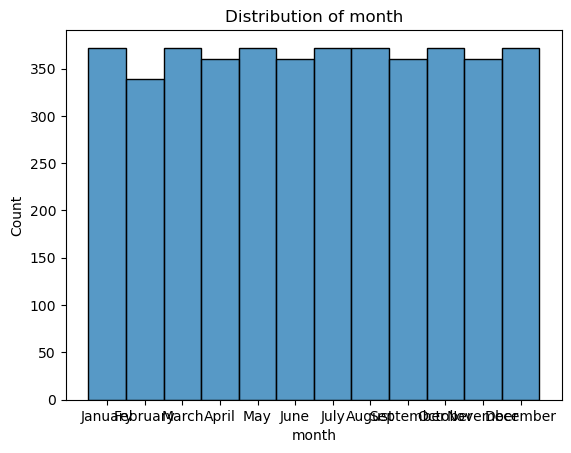

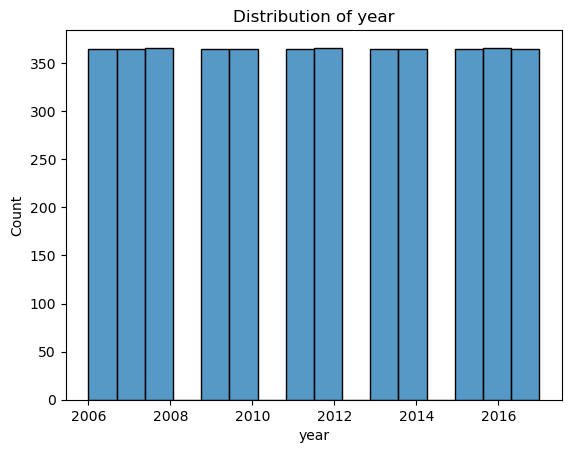

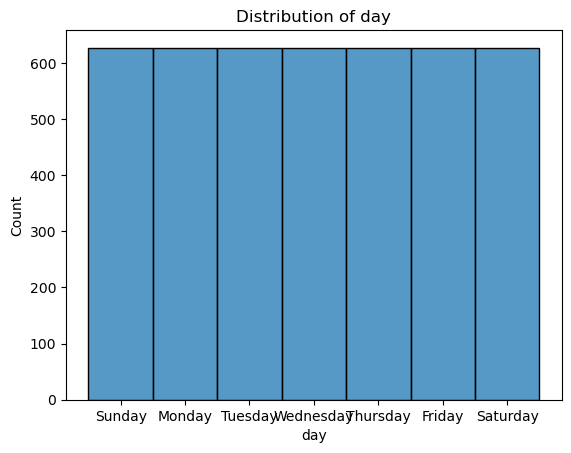

In [44]:
plot_distributions(germany)

In [45]:
# split the data 
train_size = 0.70 
n = germany.shape[0]
test_start_index = round(train_size * n)

train = germany[:test_start_index]
test = germany[test_start_index:]

In [46]:
train.head()

,Consumption,Wind,Solar,Wind+Solar,month,year,day
Date,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006,Sunday
2006-01-02,1380.521,0.0,0.0,0.0,January,2006,Monday
2006-01-03,1442.533,0.0,0.0,0.0,January,2006,Tuesday
2006-01-04,1457.217,0.0,0.0,0.0,January,2006,Wednesday
2006-01-05,1477.131,0.0,0.0,0.0,January,2006,Thursday


# Bar plot: 

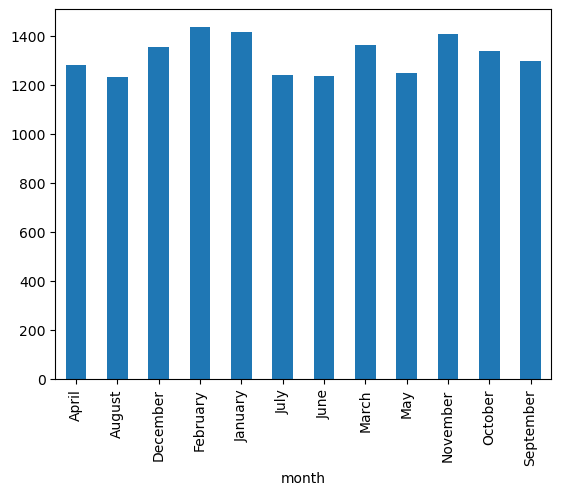

In [47]:
train.groupby('month')['Consumption'].mean().plot.bar()
plt.show()

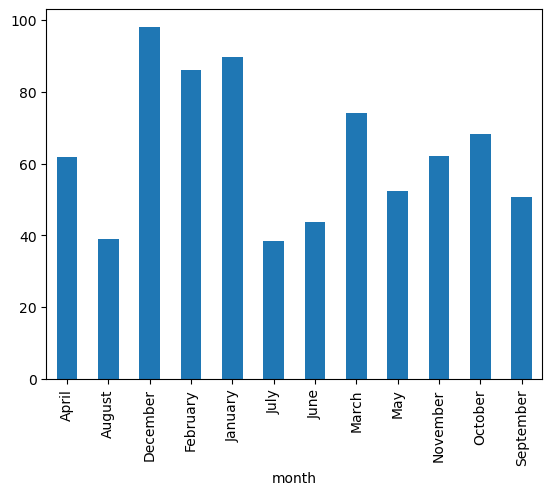

In [48]:
train.groupby('month')['Wind'].mean().plot.bar()
plt.show()

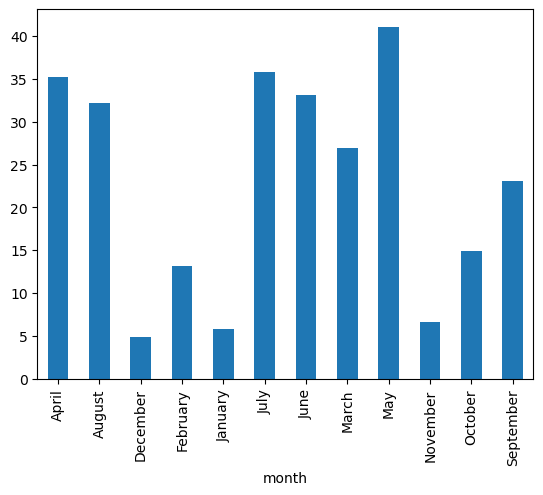

In [49]:
train.groupby('month')['Solar'].mean().plot.bar()
plt.show()

# Target over time: 

<Axes: xlabel='Date'>

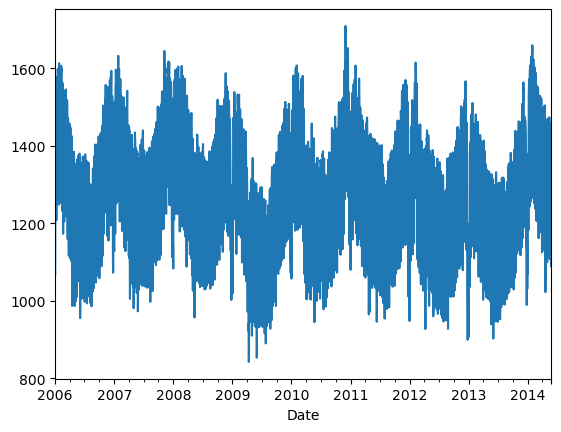

In [50]:
train.Consumption.plot()

<Axes: xlabel='month', ylabel='Consumption'>

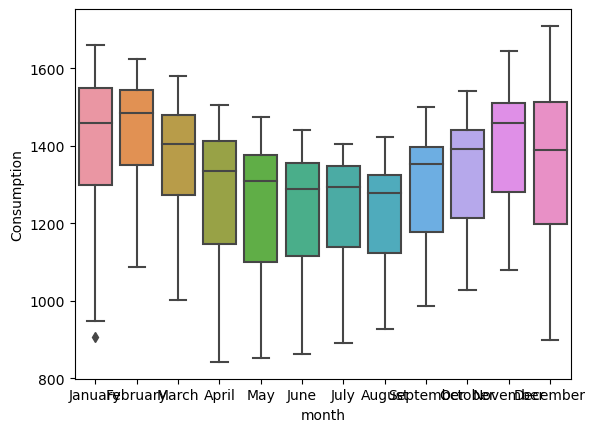

In [51]:
sns.boxplot(data = train, x = 'month', y = 'Consumption')

<Axes: xlabel='year', ylabel='Consumption'>

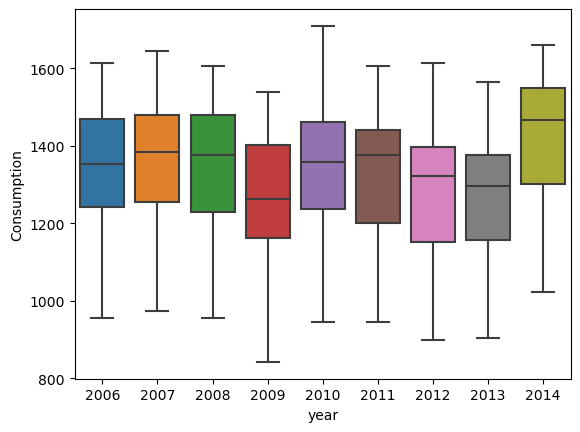

In [52]:
sns.boxplot(data = train, x = 'year', y = 'Consumption')

<Axes: xlabel='day', ylabel='Consumption'>

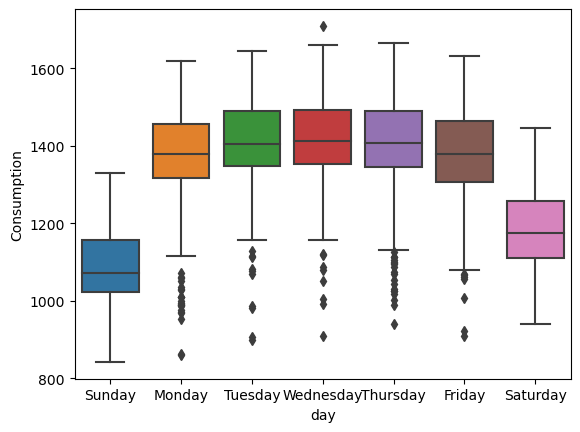

In [53]:
sns.boxplot(data = train, x = 'day', y = 'Consumption')

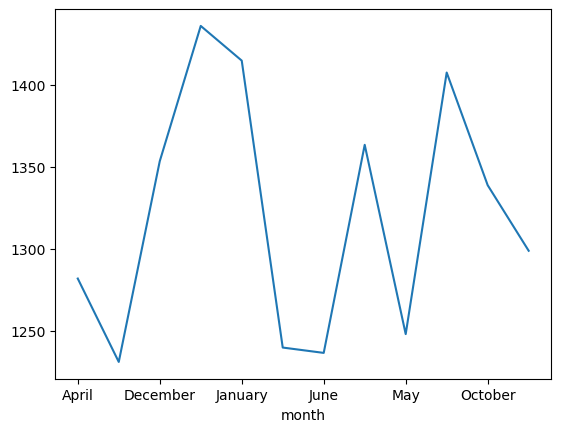

In [54]:
train.groupby('month')['Consumption'].mean().plot();

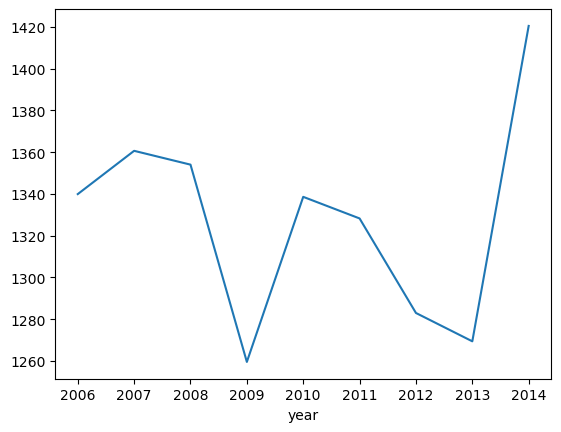

In [55]:
train.groupby('year')['Consumption'].mean().plot();

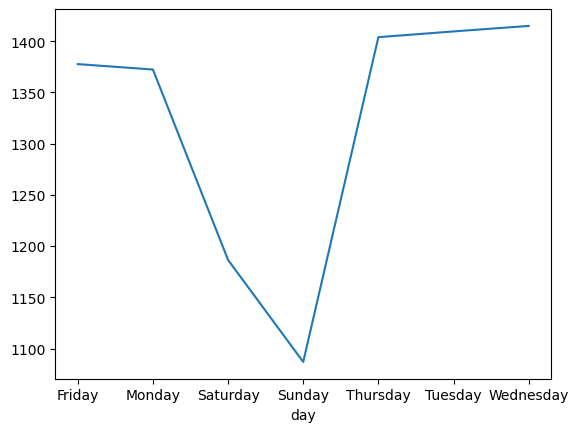

In [56]:
train.groupby('day')['Consumption'].mean().plot();

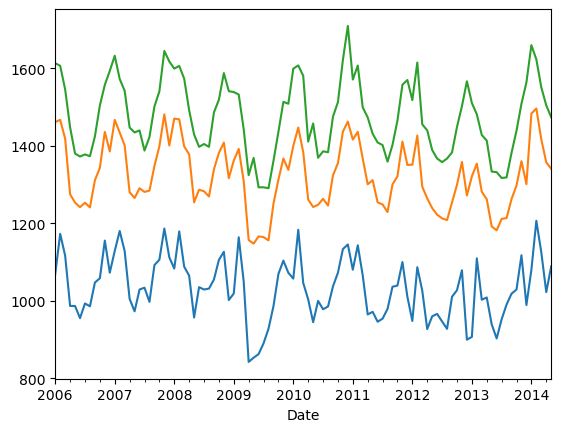

In [57]:
train.resample('M').min()['Consumption'].plot()
train.resample('M').mean()['Consumption'].plot()
train.resample('M').max()['Consumption'].plot()
plt.show()

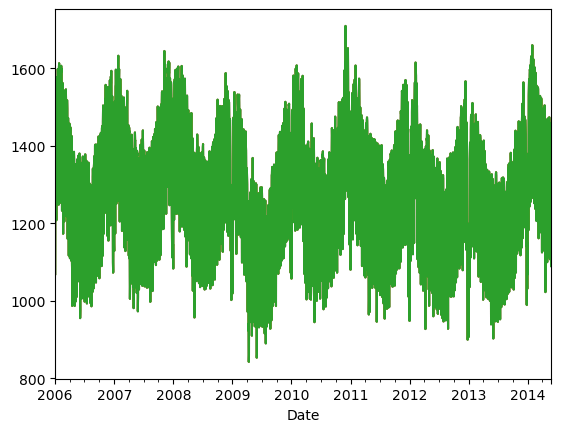

In [58]:
train.resample('D').min()['Consumption'].plot()
train.resample('D').mean()['Consumption'].plot()
train.resample('D').max()['Consumption'].plot()
plt.show()

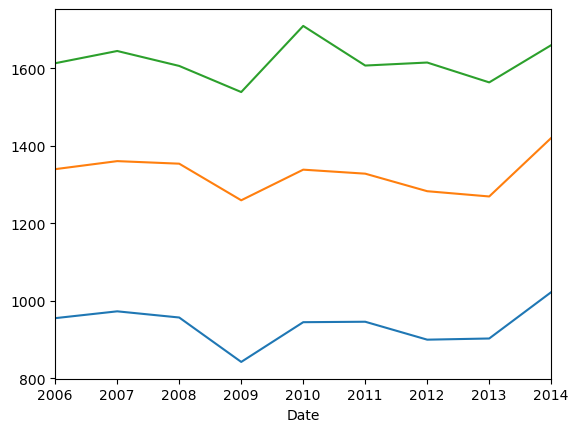

In [59]:
train.resample('Y').min()['Consumption'].plot()
train.resample('Y').mean()['Consumption'].plot()
train.resample('Y').max()['Consumption'].plot()
plt.show()

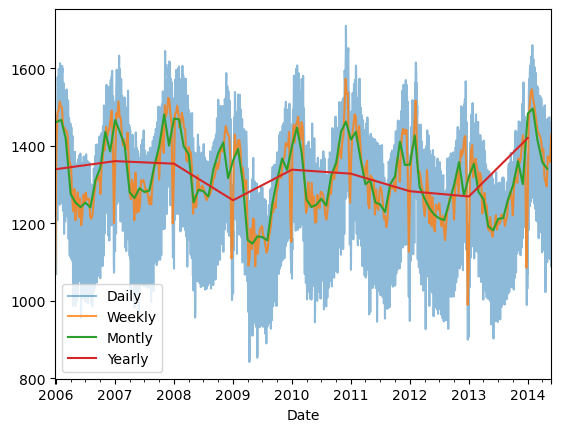

In [60]:
train.resample('D').mean()['Consumption'].plot(alpha=.5, label='Daily')
train.resample('W').mean()['Consumption'].plot(alpha=.8, label='Weekly')
train.resample('M').mean()['Consumption'].plot(label='Montly')
train.resample('Y').mean()['Consumption'].plot(label='Yearly')
plt.legend();

# Seasonal Plot

In [61]:
train.groupby([train.index.year, train.index.month]).mean()

Consumption        Wind       Solar  Wind+Solar    year
Date Date                                                         
2006 1     1461.442065    0.000000    0.000000    0.000000  2006.0
     2     1467.106893    0.000000    0.000000    0.000000  2006.0
     3     1418.649161    0.000000    0.000000    0.000000  2006.0
     4     1275.058900    0.000000    0.000000    0.000000  2006.0
     5     1253.488484    0.000000    0.000000    0.000000  2006.0
...                ...         ...         ...         ...     ...
2014 1     1483.261323  201.008677   23.954516  224.963194  2014.0
     2     1496.465536  219.141750   58.396750  277.538500  2014.0
     3     1416.458355  146.594581   96.446677  235.445226  2014.0
     4     1357.582700  118.409033  122.398433  240.807467  2014.0
     5     1340.952769  118.613077  137.156308  255.769385  2014.0

[101 rows x 5 columns]

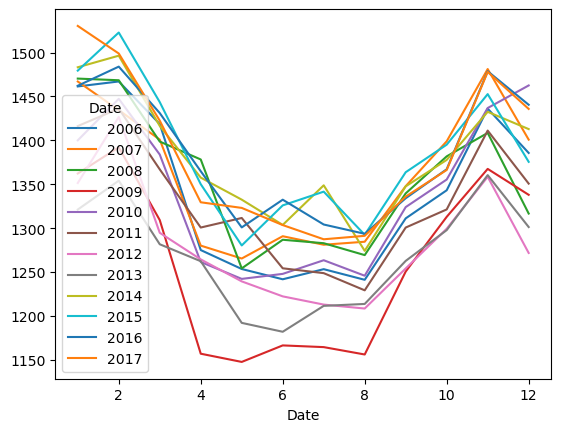

In [62]:
germany['Consumption'].groupby([germany.index.year, germany.index.month]).mean().unstack(0).plot();

# Seasonal Subseries plot: 

In [63]:
table = train['Consumption'].groupby([train.index.year, train.index.month]).mean().unstack()
table

Date,1,2,3,4,5,6,7,8,9,10,11,12
Date,,,,,,,,,,,,
2006,1461.442065,1467.106893,1418.649161,1275.058900,1253.488484,1241.781667,1253.296290,1241.188774,1311.169933,1343.161903,1436.164133,1385.686355
2007,1467.058032,1434.484357,1400.909871,1280.133167,1265.436000,1290.828733,1281.134258,1284.554355,1347.857500,1398.924581,1481.237600,1400.840161
2008,1470.373484,1468.486207,1398.653258,1378.243233,1254.194226,1286.797100,1282.866355,1269.323484,1339.615433,1381.788323,1408.506233,1316.669129
2009,1362.255613,1392.155179,1309.222387,1157.006367,1147.650742,1166.456833,1164.515871,1156.114645,1250.585967,1312.905000,1367.505100,1337.995581
2010,1400.041677,1447.322536,1383.865226,1261.505467,1242.220129,1247.938433,1263.467452,1245.832323,1324.003533,1355.390839,1436.854833,1462.556581
2011,1416.290581,1436.212607,1366.989516,1300.732300,1311.608290,1254.294333,1248.768194,1229.204935,1300.706833,1321.337484,1411.144733,1350.761871
2012,1351.441226,1426.666241,1294.748258,1264.427000,1239.388710,1222.315667,1212.953710,1208.466258,1254.097633,1299.330355,1358.505700,1271.769968
2013,1321.194935,1354.087429,1281.671581,1262.359967,1192.123032,1181.999000,1211.503484,1213.691355,1262.723900,1297.771387,1360.433367,1301.299645
2014,1483.261323,1496.465536,1416.458355,1357.582700,1340.952769,NaN,NaN,NaN,NaN,NaN,NaN,NaN


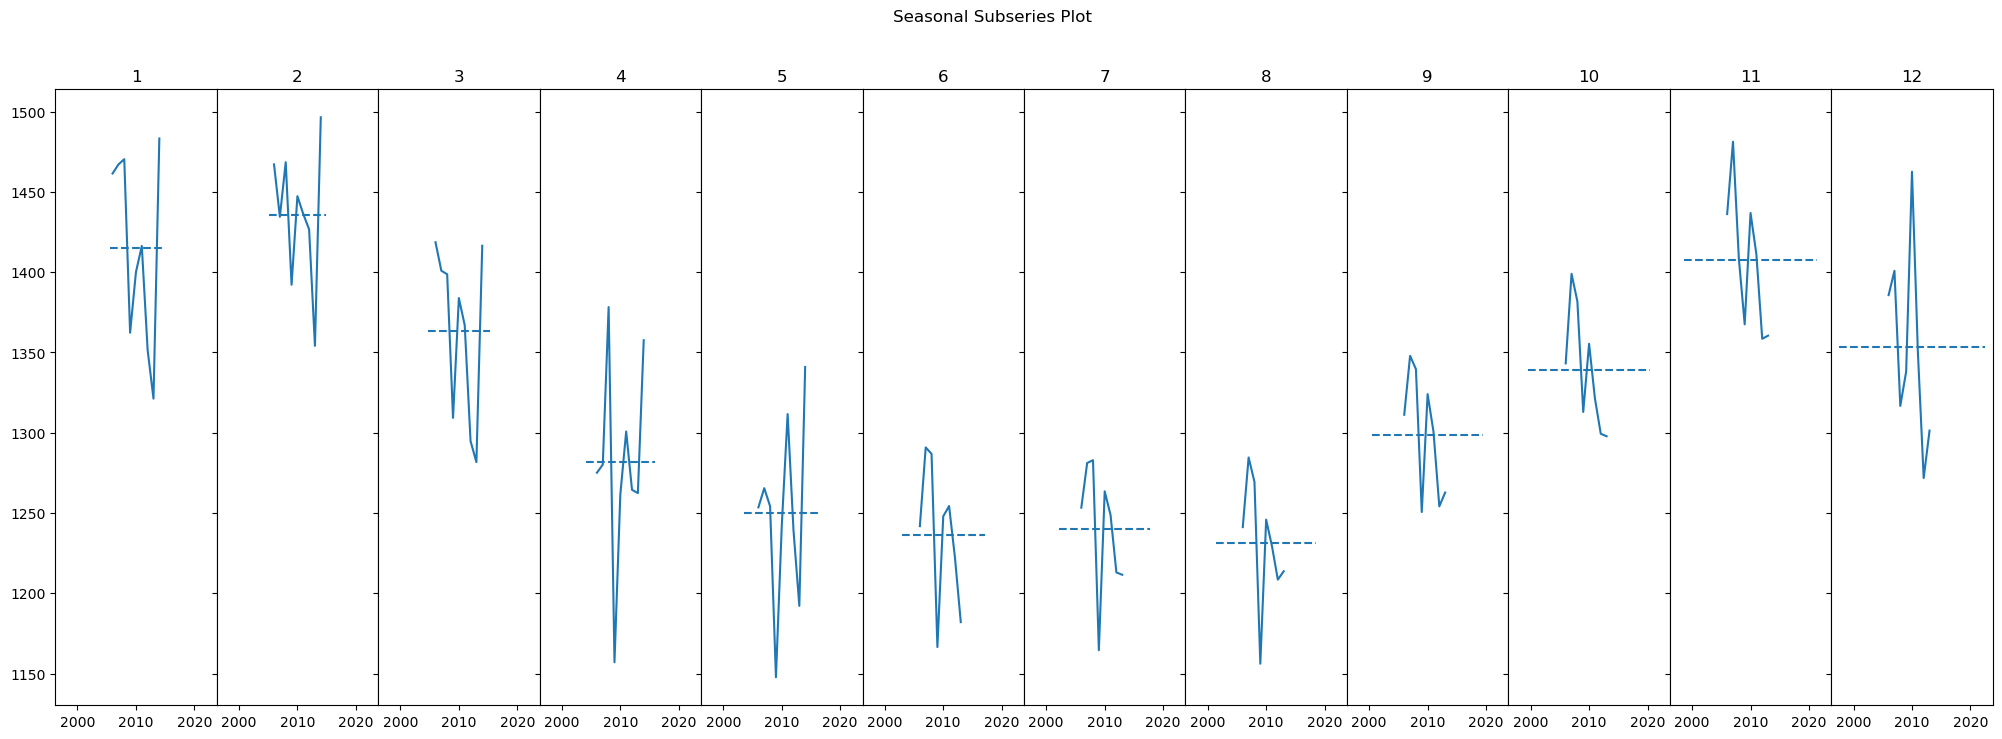

In [64]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(25,8))
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

# Lag plot:

In [65]:
week_mean = train.resample('W').mean()
week_mean.head()

,Consumption,Wind,Solar,Wind+Solar,year
Date,,,,,
2006-01-01,1069.184000,0.0,0.0,0.0,2006.0
2006-01-08,1381.300143,0.0,0.0,0.0,2006.0
2006-01-15,1486.730286,0.0,0.0,0.0,2006.0
2006-01-22,1490.031143,0.0,0.0,0.0,2006.0
2006-01-29,1514.176857,0.0,0.0,0.0,2006.0


In [66]:
# shift it:
week_mean['shifted'] = week_mean['Consumption'].shift(-1)
week_mean.head()

,Consumption,Wind,Solar,Wind+Solar,year,shifted
Date,,,,,,
2006-01-01,1069.184000,0.0,0.0,0.0,2006.0,1381.300143
2006-01-08,1381.300143,0.0,0.0,0.0,2006.0,1486.730286
2006-01-15,1486.730286,0.0,0.0,0.0,2006.0,1490.031143
2006-01-22,1490.031143,0.0,0.0,0.0,2006.0,1514.176857
2006-01-29,1514.176857,0.0,0.0,0.0,2006.0,1501.403286


Text(0, 0.5, 'Consumption Tomorrow')

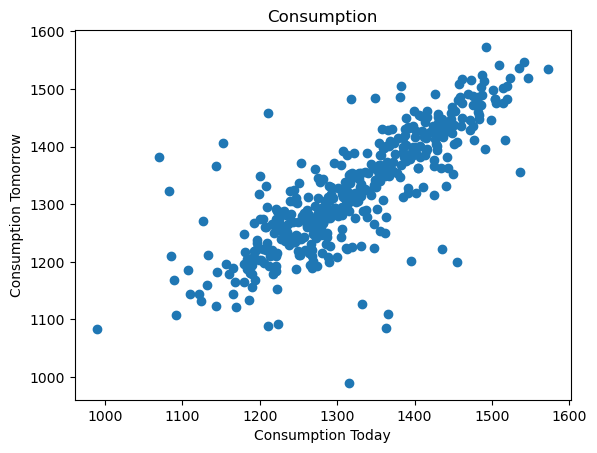

In [67]:
plt.scatter(week_mean['Consumption'], week_mean['shifted'])
plt.title('Consumption')
plt.xlabel('Consumption Today')
plt.ylabel('Consumption Tomorrow')

# Autocorrelation plot: 

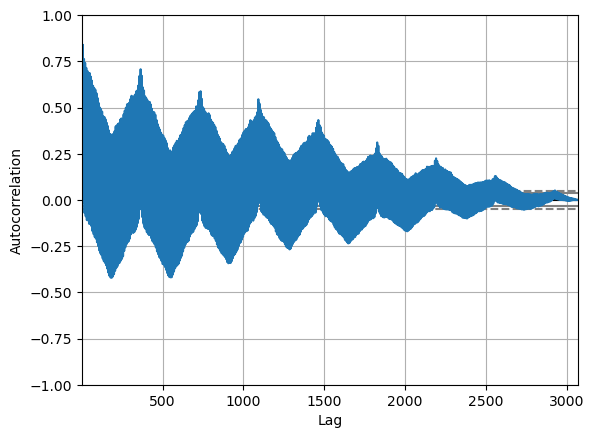

In [68]:
pd.plotting.autocorrelation_plot(train.Consumption.resample('D').mean());

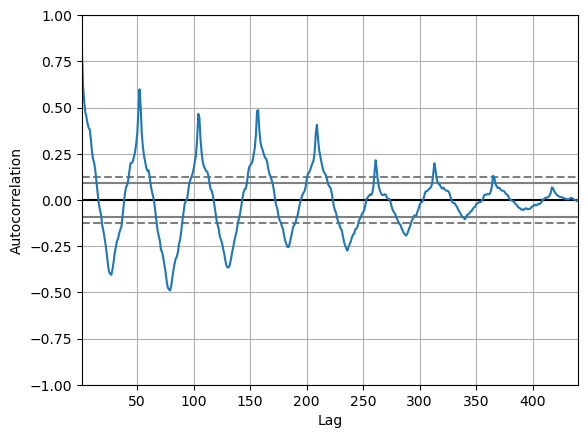

In [69]:
pd.plotting.autocorrelation_plot(train.Consumption.resample('W').mean());

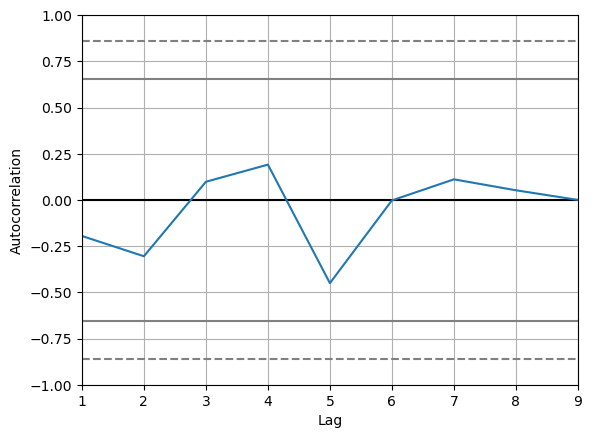

In [70]:
pd.plotting.autocorrelation_plot(train.Consumption.resample('Y').mean());

# Categories Over time: 

In [72]:
train = train.resample('D').mean()
# create a categorical feature
train['consumption_bin'] = pd.qcut(train.Consumption, 3, labels=['low', 'medium', 'high'])
train.groupby('consumption_bin').mean()

,Consumption,Wind,Solar,Wind+Solar,year
consumption_bin,,,,,
low,1125.874587,65.577156,26.331001,69.319043,2009.879765
medium,1345.901834,59.831141,29.165084,65.998640,2009.715264
high,1493.085339,66.784214,13.010112,46.922207,2009.548387


In [90]:
# create a categorical feature
train['consumption_bin'] = pd.qcut(train.Consumption, 4, labels=['low', 'medium', 'high', 'very high'])
train.groupby('consumption_bin').mean()

,Consumption,Wind,Solar,Wind+Solar,year
consumption_bin,,,,,
low,1087.649859,68.201849,26.064661,71.244773,2009.886571
medium,1289.750096,59.904017,35.251571,74.720832,2009.889179
high,1393.519502,61.971953,17.350962,52.406993,2009.615385
very high,1515.531231,66.184382,12.666150,44.607074,2009.466754
